In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Introduction

Analyzing and understanding prices of shoes based brands, colors, category. 

# Who would be interested
Retailers who plan to stock some shoes based on price,category,colors
Buyers who want to understand which brands go on sale more 
and manufacturers who want to understand new markets

# Data
Datafiniti_Womens_Shoes1 is a dataset that consists of different brands, along with their color,
name of the shoe, price maximum, minimum, whether its on sale or not and category

# Methodology
This dataset will be analyzed to answer the following questions
* What is the average price of each distinct brand listed?
* What are the prices ranges for different category of shoes and how many brands of shoes do we have in a category
* Is there a price distribution based on the color of the shoes?
* Which brand and category have sales?

In [206]:
df=pd.read_csv("Datafiniti_Womens_Shoes1.csv")
df.head()
df.columns

Index(['brand', 'name', 'prices.amountMax', 'prices.amountMin', 'prices.color',
       'prices.isSale', 'size', 'category', 'color'],
      dtype='object')

In [207]:
df['average']=round((df["prices.amountMax"]+df["prices.amountMin"])/2,2)
df['difference']=round((df["prices.amountMax"]-df["prices.amountMin"]),2)
pd.options.mode.chained_assignment = None  # default='warn'
df1=df[[ "brand", "prices.amountMax",
       "prices.amountMin","average","difference"]]

df1.head()

,brand,prices.amountMax,prices.amountMin,average,difference
0,2 lips too,64.95,39.99,52.47,24.96
1,2 lips too,64.95,49.99,57.47,14.96
2,2 lips too,64.95,49.99,57.47,14.96
3,2 lips too,64.95,39.99,52.47,24.96
4,2 lips too,64.95,42.49,53.72,22.46


# Question
* What is the average price of each distinct brand listed?

Text(0.5, 1.0, 'Most expensive average price brand')

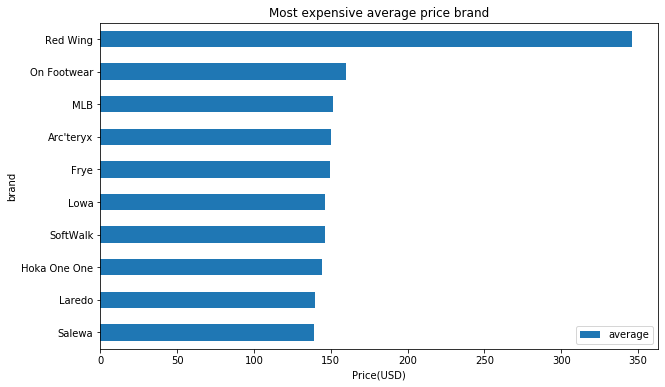

In [4]:
df2 = df1.groupby(['brand'], as_index=False).mean()
df2.sort_values(by='average',ascending=False,inplace=True)
df3=df2.head(10)
df3.drop(['prices.amountMax','prices.amountMin','difference'],axis=1,inplace=True)
df3.set_index('brand', inplace=True)
ax = df3.plot(kind='barh', figsize=(10, 6))
plt.xlabel('Price(USD)')
ax.invert_yaxis()
plt.title('Most expensive average price brand')

# Observation
Red Wing, On Footwear, MLB, Arcteryc etc are the most expensive brands available in teh market.

# Question
* Which category and price ranges have more brands of shoes than others

In [6]:
df6 = df.groupby(['brand','category'], as_index=False).mean()
df6.round(0)
df6["average"]=df6["average"].astype(int)
df6["difference"]=df6["difference"].astype(int)
df6["prices.amountMax"]=df6["prices.amountMax"].astype(int)
df6["prices.amountMin"]=df6["prices.amountMin"].astype(int)
df6["prices.isSale"]=round(df6["prices.isSale"].astype(float),2)
df6.drop(["size","prices.isSale","prices.amountMax","prices.amountMin","difference"], axis=1, inplace=True)
df6.head()

,brand,category,average
0,2 lips too,Pumps,60
1,Adidas,Athletic,116
2,Adidas Outdoor,Athletic,107
3,Altra,Athletic,120
4,Arc'teryx,Athletic,150


In [7]:
bins = [0, 25, 50, 75, 100, 125, 150,200,250,300,350,400]
labels = ["0-25","25-50","50-75","75-100","100-125","125-150","150-200","200-250","250-300","300-350","350-400"]
df6['averageprice'] = pd.cut(df6['average'], bins=bins, labels=labels)
dfcount = df6.groupby(['averageprice','category'], as_index=False).count()
dfcount.dropna(subset=["brand"],axis=0,inplace=True)
dfcount.drop(['average'],axis=1,inplace=True)
dfcount.rename(columns={'brand':'brand count'},inplace=True)
bins = [0, 1,2, 4, 8, 10,20]
labels = ["1","2","3-4","4-8","8-10",">10"]
dfcount['binnedbrandcount'] = pd.cut(dfcount['brand count'], bins=bins, labels=labels)
dfcount.drop(['brand count'],axis=1,inplace=True)
print (dfcount)

    averageprice      category binnedbrandcount
2           0-25  Casual Shoes              4-8
4           0-25         Flats                1
9           0-25       Sandals                1
10          0-25      Slippers                1
11         25-50      Athletic                2
12         25-50         Boots              4-8
13         25-50  Casual Shoes             8-10
15         25-50         Flats              3-4
17         25-50       Oxfords                1
20         25-50       Sandals              3-4
21         25-50      Slippers                2
22         50-75      Athletic              >10
23         50-75         Boots              >10
25         50-75         Clogs                2
26         50-75         Flats                1
28         50-75       Oxfords              3-4
29         50-75         Pumps              4-8
30         50-75       Rampage                1
31         50-75       Sandals              3-4
33        75-100      Athletic          

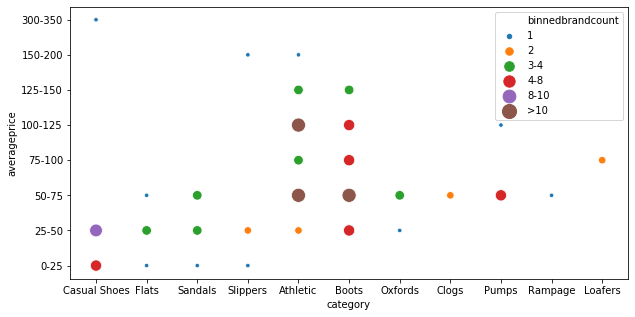

In [8]:
plt.figure(figsize=(10,5))
ax = sns.scatterplot(x="category", y="averageprice",hue="binnedbrandcount", size="binnedbrandcount",sizes=(200, 20),data=dfcount)

# Result
There are a lot of atheletic shoe brands in the $25-$150 range , there are a lot of brands in the boots category in the $25-$150 range . 

# Observation
There is an opportunity to cut down on some of hte casual shoe lines give there are so many
There is also an opportunity to have more atheletic shoes  in $25-$50 range


# Question
* For the Nike brand, what is the price distribution based on color

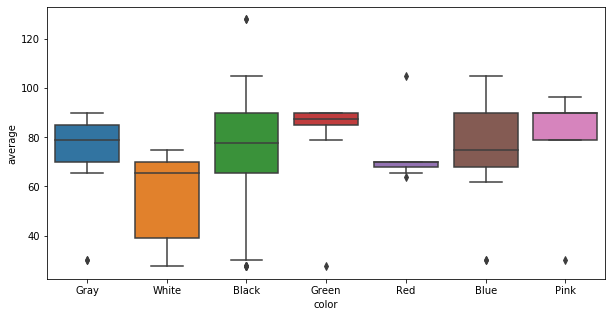

In [10]:
dfcolor=df[[ "brand", "prices.amountMax",
       "prices.amountMin","average","difference","color"]]
dfcolor.head()
dfcolorbrand=dfcolor.loc[dfcolor['brand'] =="Nike"]
plt.figure(figsize=(10,5))
ax = sns.boxplot(x="color", y="average", data=dfcolorbrand)


# Observation 
For Nike brand, which is an atheletic brand , gray and brown seems to have the least price variation and black shoes have the greatest variation
The price of white shoes are generally lower than black shoes

# Recommendation
If a new shoe line is started, i recommend either gray or brown shoes instead of white shoes

# Question
* Which brands go on sale more

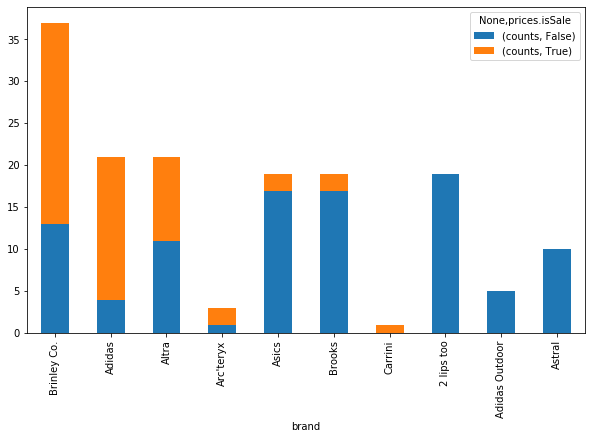

In [147]:
df7=df[[ "brand","prices.isSale","average"]]
df8=df7.groupby(['brand','prices.isSale']).size().reset_index(name='counts')
df8 = df8.pivot(index='brand',columns='prices.isSale')

df8 = df8.fillna(0)
df8 = df8.reindex(df9['counts'].sort_values(by=True, ascending=False).index)
df9.plot.bar(figsize=(10,6),stacked=True)

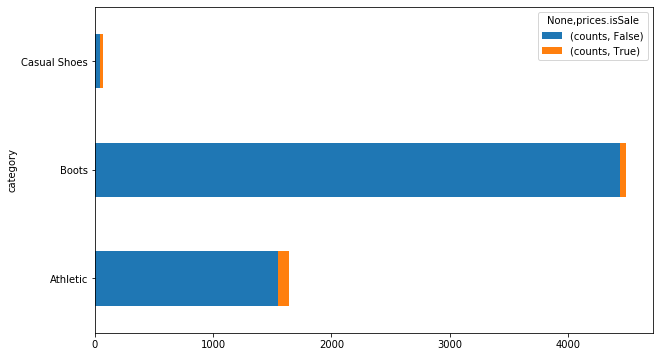

In [210]:
df7=df[["category", "prices.isSale","average"]]
df8=df7.groupby(['category','prices.isSale']).size().reset_index(name='counts')
df8 = df8.pivot(index='category',columns='prices.isSale')
df8 = df8.fillna(0)
df8 = df8.reindex(df8['counts'].sort_values(by=True, ascending=False).index)
df9=df8.head(3)
df9.plot.barh(figsize=(10,6),stacked=True)


In [ ]:
# Result
The result shows Althetic shoes, boots and casual shoes go on sale more often

# Observation
With so many brands of shoes in athletic and boots category, it is no surpise that they go on sale.
As for casual shoes, most of the shoes in the $25-$50 range go on sale given there are so many brands